# Pooled Bias Across Visual Varying Sitmului

Tim's git hub code: https://github.com/TimCSheehan/historyResponseModeling

Holly's data: 'data/WM_noisev8_230316.csv'

The path to the data is: smb://cube.ucsd.edu/pclexp/Holly/Holmes/Data. The .mat files are individual subject's data which I compiled the information that I needed to take a preliminary look at main effects in a .csv file in the same folder.


Holly's Data: 
- [x] kappa - bandwidth of the orientation filter for the target stimuli (low kappa means an orientation that looks more noisy and high kappa is an orientation that looks clearer)
- [x] traj - trajectory which is the trajectory of the response (which way they spun the orientation response line)
- [x] orient - probed item orientation (aka correctAngle)
- [x] distractor - non-probed item orientation (aka distractAngle)
- [x] respRT - response time (aka RT) 
- [x] acc - accuracy (the target orientation - the response orientation); aka E
- [x] resp - final orientation response in degrees (aka respAngle)
- [x] subject - participant

To do: 
1st
- Filter the data based on distrctor (0 or 1) 
- Plot serial dependence w/ and w/o distractor 

2nd
- Filter the data based on kappa (50, 100, 5000) 
- Loop through trials, store data in a dataframe 
    - low - low 
    -  high - low 
    - high - high 
    - low - high 
    


In [3]:
# imports/ helper functions
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, optimize
pi=np.pi
pm = np.array((-1,1))
r2d,d2r = 180/pi,pi/180
r2d2,d2r2  = 90/pi,pi/90
ori_wrap = lambda x: SDF.wrap(x*2)/2

# modules from this package.
import SD_functions as SDF
import responseModel as RM

def sav_fig(nam):
    root = './Figs/'
    plt.savefig(root + nam +'.svg',dpi=1200)

# Load Data.
1- row per trial. Particiapnts concatenated vertically.


**Informative Columns:**
1. orient - probed item orientation (aka correctAngle)
1. subject       - participant
1. distractor - non-probed item orientation (aka distractAngle)
1. resp    - reported orientation (aka respAngle)
1. acc             - wrap(respAngle-correctAngle); aka (E)
1. respRT            - response time. timed out at 5000ms (aka respRT)
1. indProbed     - which item was probed (First, 0; or second, 1)

**Uninformative Columns:** kappa, traj

In [5]:
data = pd.read_csv('historyResponseModeling/data/hollypooleddata.csv')
data.head()
display(data)

# # Replace empty or whitespace values with NaN
# data.replace(" ", np.NaN, inplace=True)



,orient,distractor,kappa,subject,resp,respRT,acc,traj
0,47,0.00,100,2,NaN,0.000000,NaN,0.0
1,143,1.00,5000,2,153.0,2.423917,10.0,50.0
2,84,0.00,50,2,NaN,0.000000,NaN,0.0
3,104,0.00,100,2,106.0,1.882485,2.0,-19.0
4,161,1.00,50,2,NaN,0.000000,NaN,0.0
...,...,...,...,...,...,...,...,...
15115,117,1.00,100,43,99.0,2.541777,-18.0,70.0
15116,109,0.15,5000,43,127.0,2.506347,18.0,-17.0
15117,101,1.00,5000,43,104.0,2.541367,3.0,-13.0
15118,159,0.15,50,43,21.0,2.541478,42.0,-156.0


In [21]:
# data.info()

In [20]:
# data.describe()


# Visualizing the data

In [19]:
# # Visualize missing values in the dataset
# import missingno

# missingno.matrix(data)
# plt.show()


In [18]:
# import plotly.express as px
# import pandas as pd

# # # Load data from CSV file
# # data = pd.read_csv("data.csv")

# # Create a scatter plot
# fig = px.scatter(data, x="subject", y="acc")

# # Add labels and title
# fig.update_xaxes(title="Subject Numeber")
# fig.update_yaxes(title="Accuracy")
# fig.update_layout(title="Data visualization - Subject x Accuracy")

# # Show the chart
# fig.show()

# Distractor vs. Control 


In [9]:
# Initialize an empty list to store the distractor-distractor pair
distractor_distractor_pairs = []

# Loop through each row in the DataFrame
for i in range(1, len(data)):
    # Check if the distractor value is > 0 for both the current row and the previous row
    if data.iloc[i]["distractor"] > 0 and data.iloc[i-1]["distractor"] > 0:
        # If both have a distractor value > 0, append the entire row to the list
        distractor_distractor_pairs.append(data.iloc[i-1])
        distractor_distractor_pairs.append(data.iloc[i])
        
# Create a new DataFrame from the selected rows
distractor_distractor_data = pd.DataFrame(distractor_distractor_pairs)

# Print the list of distractor-distractor pairs
print(distractor_distractor_data.head())


   orient  distractor   kappa  subject   resp    respRT   acc   traj
6     8.0        0.15  5000.0      2.0    NaN  0.000000   NaN    0.0
7   169.0        1.00   100.0      2.0  119.0  1.776715 -50.0  104.0
7   169.0        1.00   100.0      2.0  119.0  1.776715 -50.0  104.0
8    18.0        1.00   100.0      2.0    NaN  0.000000   NaN    0.0
8    18.0        1.00   100.0      2.0    NaN  0.000000   NaN    0.0


In [10]:
# Initialize an empty list to store no-distractor pairs
no_distractor_pairs = []

# Loop through each row in the DataFrame
for i in range(1, len(data)):
    # Check if the distractor value is > 0 for both the current row and the previous row
    if data.iloc[i]["distractor"] == 0 and data.iloc[i-1]["distractor"] == 0:
        # If both have a distractor value == 0, append the entire row to the list
        no_distractor_pairs.append(data.iloc[i-1])
        no_distractor_pairs.append(data.iloc[i])
        
# Create a new DataFrame from the selected rows
no_distractor_data = pd.DataFrame(no_distractor_pairs)

# Print the list of distractor-distractor pairs
print(no_distractor_data.head())


    orient  distractor   kappa  subject   resp    respRT   acc   traj
2     84.0         0.0    50.0      2.0    NaN  0.000000   NaN    0.0
3    104.0         0.0   100.0      2.0  106.0  1.882485   2.0  -19.0
35   103.0         0.0  5000.0      2.0   14.0  2.317893 -89.0 -141.0
36   134.0         0.0  5000.0      2.0    NaN  0.000000   NaN    0.0
36   134.0         0.0  5000.0      2.0    NaN  0.000000   NaN    0.0


In [11]:
#distractor_distractor pairs
nb=-1
d_ori = SDF.get_nb(nb,distractor_distractor_data['orient'].values,1,ori_wrap) # dStim_nb
tmp_ori = SDF.wrap(distractor_distractor_data.orient * 2) / 2


n_bns = 91
bns = np.linspace(-90,90,n_bns)
overlap = 3

# ind = (np.isnan(data['acc']))
# tmp_data = data['acc'][ind==False]
# tmp_ori = data.orient[ind==False]
distractor_distractor_sd = SDF.do_bining(bns,overlap,d_ori,distractor_distractor_data['acc']*d2r2,want_var='circ_mean')*r2d2
distractor_distractor_cb = SDF.do_bining(bns,overlap,tmp_ori,distractor_distractor_data['acc']*d2r2,want_var='circ_mean')*r2d2


In [12]:
#no distractor pairs
nb=-1
d_ori = SDF.get_nb(nb,no_distractor_data['orient'].values,1,ori_wrap) # dStim_nb
tmp_ori = SDF.wrap(no_distractor_data.orient * 2) / 2


n_bns = 91
bns = np.linspace(-90,90,n_bns)
overlap = 3

# ind = (np.isnan(data['acc']))
# tmp_data = data['acc'][ind==False]
# tmp_ori = data.orient[ind==False]
no_distractor_sd = SDF.do_bining(bns,overlap,d_ori,no_distractor_data['acc']*d2r2,want_var='circ_mean')*r2d2
no_distractor_cb = SDF.do_bining(bns,overlap,tmp_ori,no_distractor_data['acc']*d2r2,want_var='circ_mean')*r2d2


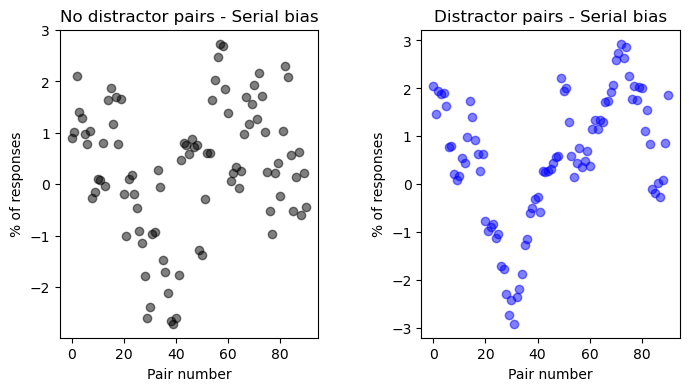

In [44]:
######################################
#Plotting the SERIAL BIAS

# Create the figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))


#### Serial Bias###
# Create an array of pair numbers for the control consition (no distractor)
pair_numbers = np.arange(len(no_distractor_sd))

# Plot the scatter plot of the pairs in series by their serial bias
axes[0].scatter(pair_numbers, no_distractor_sd, alpha=0.5, color = "black", label = "No distractor")

# Set the size, title and axis labels
axes[0].set_title("No distractor pairs - Serial bias")
axes[0].set_xlabel("Pair number")
axes[0].set_ylabel("% of responses")

#### Distracor pairs - Serial Bias### 
# Create an array of pair numbers for the control consition (no distractor)
pair_numbers_distractor_pairs = np.arange(len(distractor_distractor_sd))

# Plot the scatter plot of the pairs in series by their serial bias
axes[1].scatter(pair_numbers_distractor_pairs, distractor_distractor_sd, alpha=0.5, color ='blue', label = "Distractor pairs")

# Set the size, title and axis labels
axes[1].set_title("Distractor pairs - Serial bias")
axes[1].set_xlabel("Pair number")
axes[1].set_ylabel("% of responses")

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)




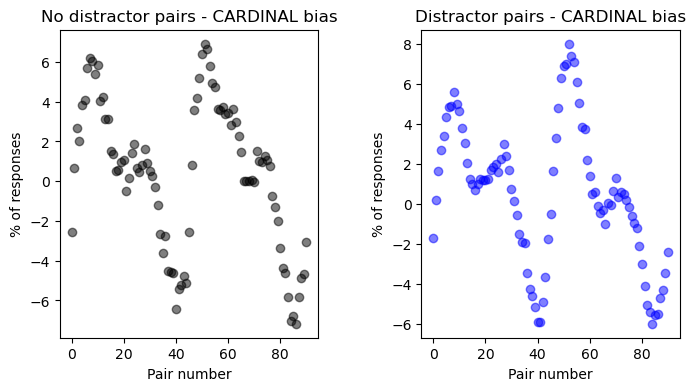

In [45]:
#####################################
#Plotting the CARDINAL BIAS

# Create the figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))


#### Serial Bias###
# Create an array of pair numbers for the control consition (no distractor)
pair_numbers = np.arange(len(no_distractor_cb))

# Plot the scatter plot of the pairs in series by their serial bias
axes[0].scatter(pair_numbers, no_distractor_cb, alpha=0.5, color = "black", label = "No distractor")

# Set the size, title and axis labels
axes[0].set_title("No distractor pairs - CARDINAL bias")
axes[0].set_xlabel("Pair number")
axes[0].set_ylabel("% of responses")

#### Distracor pairs - Serial Bias### 
# Create an array of pair numbers for the control consition (no distractor)
pair_numbers_distractor_pairs = np.arange(len(distractor_distractor_cb))

# Plot the scatter plot of the pairs in series by their serial bias
axes[1].scatter(pair_numbers_distractor_pairs, distractor_distractor_cb, alpha=0.5, color ='blue', label = "Distractor pairs")

# Set the size, title and axis labels
axes[1].set_title("Distractor pairs - CARDINAL bias")
axes[1].set_xlabel("Pair number")
axes[1].set_ylabel("% of responses")

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)



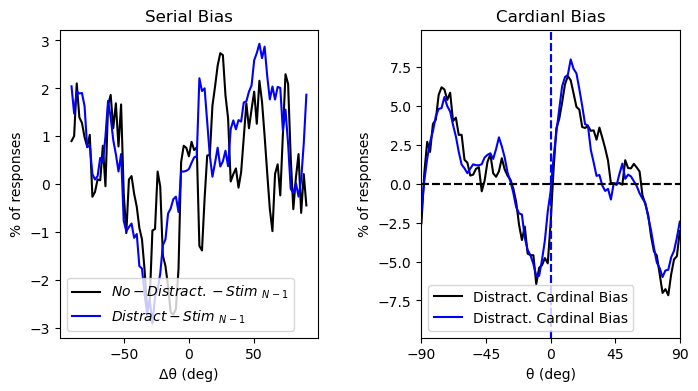

In [54]:
# Create a figure with two subplots side-by-side
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))

#Serial Bias - distractor vs. no distractor 
axs[0].plot(bns, no_distractor_sd, 'k', label='$No-Distract.-Stim~_{N-1}$')
axs[0].plot(bns, distractor_distractor_sd, 'b', label='$Distract-Stim~_{N-1}$')
axs[0].set_xlabel("Δθ (deg)")
axs[0].set_ylabel("% of responses")
SDF.d_plot(1, 9.9, -90)
axs[0].legend()
axs[0].set_title('Serial Bias')

#graph cardinal bias - distractor vs. no distractor 
axs[1].plot(bns, no_distractor_cb, color='k', label='Distract. Cardinal Bias')
axs[1].plot(bns, distractor_distractor_cb, color='b', label='Distract. Cardinal Bias')
axs[1].set_xlabel("θ (deg)")
axs[1].set_ylabel("% of responses")
SDF.d_plot(1, 9.9, -90)
axs[1].legend()
axs[1].set_title('Cardianl Bias')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

# STOPPED HERE 










## Distractor-Distractor vs. Control 

Here I am specifying if there was a distractor followed by a distractor 

In [13]:
#Distractor-distractor:  

# Initialize an empty list to store the selected rows
distractor_selected_rows = []

# Loop through each row in the DataFrame
for index, row in data.iterrows():
    # Check if the distractor value is greater than 0 and if the previous row's distractor value is also greater than 0
    if row["distractor"] > 0 and data.loc[index - 1, "distractor"] > 0:
        # If the current and previous distractor values are both greater than 0, append the row to the list
        distractor_selected_rows.append(row)

# Create a new DataFrame from the selected rows
distractor_selected_data = pd.DataFrame(distractor_selected_rows)

# Print the selected data
print(distractor_selected_data)

       orient  distractor   kappa  subject   resp    respRT   acc   traj
7       169.0        1.00   100.0      2.0  119.0  1.776715 -50.0  104.0
8        18.0        1.00   100.0      2.0    NaN  0.000000   NaN    0.0
9        34.0        1.00  5000.0      2.0   20.0  2.553185 -14.0 -100.0
12       57.0        1.00    50.0      2.0    NaN  0.000000   NaN    0.0
13      136.0        0.15   100.0      2.0  130.0  1.824038  -6.0   56.0
...       ...         ...     ...      ...    ...       ...   ...    ...
15115   117.0        1.00   100.0     43.0   99.0  2.541777 -18.0   70.0
15116   109.0        0.15  5000.0     43.0  127.0  2.506347  18.0  -17.0
15117   101.0        1.00  5000.0     43.0  104.0  2.541367   3.0  -13.0
15118   159.0        0.15    50.0     43.0   21.0  2.541478  42.0 -156.0
15119    38.0        1.00    50.0     43.0   15.5  2.541546 -22.5  -67.5

[6712 rows x 8 columns]


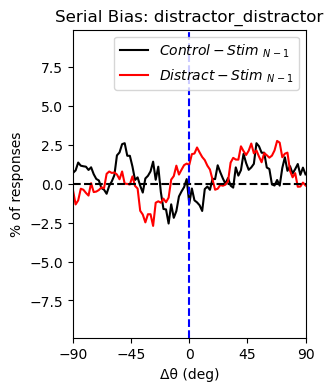

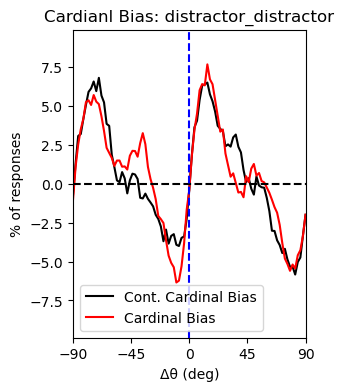

In [14]:
#graph distractor-distractor 
nb=-1
d_ori = SDF.get_nb(nb,distractor_selected_data['orient'].values,1,ori_wrap) # dStim_nb
tmp_ori = SDF.wrap(distractor_selected_data.orient * 2) / 2


n_bns = 91
bns = np.linspace(-90,90,n_bns)
overlap = 3

# ind = (np.isnan(data['acc']))
# tmp_data = data['acc'][ind==False]
# tmp_ori = data.orient[ind==False]
distractor_distractor_sd = SDF.do_bining(bns,overlap,d_ori,distractor_selected_data['acc']*d2r2,want_var='circ_mean')*r2d2
distractor_distractor_cb = SDF.do_bining(bns,overlap,tmp_ori,distractor_selected_data['acc']*d2r2,want_var='circ_mean')*r2d2

#Serial Bias - distractor vs. no distractor 

plt.figure(figsize=(3,4))
plt.plot(bns,control_sd,'k',label='$Control-Stim~_{N-1}$')

plt.plot(bns,distractor_distractor_sd,'r',label='$Distract-Stim~_{N-1}$')
plt.xlabel("Δθ (deg)")
plt.ylabel("% of responses")
SDF.d_plot(1,9.9,-90)
plt.legend()
plt.title('Serial Bias: distractor_distractor')
plt.show()

#graph cardinal bias - distractor vs. no distractor 
plt.figure(figsize=(3,4))
plt.plot(bns,control_cb,color='k',label='Cont. Cardinal Bias')
plt.plot(bns,distractor_distractor_cb,color='r',label='Cardinal Bias')
plt.xlabel("Δθ (deg)")
plt.ylabel("% of responses")  
SDF.d_plot(1,9.9,-90)
plt.legend()
plt.title('Cardianl Bias: distractor_distractor')
plt.show()


#  Division by Kappa Value

- Filter the data based on kappa (50, 100, 5000) 
- Loop through trials, store data in a dataframe 
    - low - low 
    -  high - low 
    - high - high 
    - low - high 
    
  *This is across all trials (distractor and non-distractor) 
    

## Low - Low Kappa (all trials)

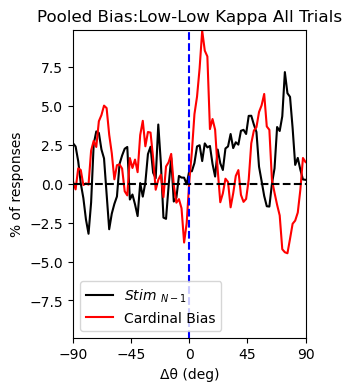

In [22]:
# Initialize an empty list to store the trials that had a distractor
low_low_kappa_cond = []

# Loop through each row in the DataFrame
for index, row in data.iterrows():
    # Check if the distractor value is > 0 
    if row["kappa"] == 50 and data.loc[index-1, "kappa"] == 50:
        # If the distractor value is > 0, append the trial to the list
        low_low_kappa_cond.append(row)
        
# Create a new DataFrame from the selected rows
low_low_kappa_cond_data = pd.DataFrame(low_low_kappa_cond)

#graph low_low_kappa serial dependence 
nb=-1
d_ori = SDF.get_nb(nb,low_low_kappa_cond_data['orient'].values,1,ori_wrap) # dStim_nb
tmp_ori = SDF.wrap(low_low_kappa_cond_data.orient * 2) / 2


n_bns = 91
bns = np.linspace(-90,90,n_bns)
overlap = 3

# ind = (np.isnan(data['acc']))
# tmp_data = data['acc'][ind==False]
# tmp_ori = data.orient[ind==False]
low_low_kappa_cond_sd = SDF.do_bining(bns,overlap,d_ori,low_low_kappa_cond_data['acc']*d2r2,want_var='circ_mean')*r2d2
low_low_kappa_cond_cb = SDF.do_bining(bns,overlap,tmp_ori,low_low_kappa_cond_data['acc']*d2r2,want_var='circ_mean')*r2d2

#Serial Bias - low-low kappa

# #Control w/ out distractor
# plt.plot(bns,control_sd,'r',label='$Control-Stim~_{N-1}$')
# plt.plot(bns,control_cb,color='k',label='Cont. Cardinal Bias')

plt.figure(figsize=(3,4))
plt.plot(bns,low_low_kappa_cond_sd,'k',label='$Stim~_{N-1}$')
plt.plot(bns,low_low_kappa_cond_cb,color='r',label='Cardinal Bias')
plt.xlabel("Δθ (deg)")
plt.ylabel("% of responses")
SDF.d_plot(1,9.9,-90)
plt.legend()
plt.title('Pooled Bias:Low-Low Kappa All Trials')

# # Print the list of subjects where distractor is > 0 
# low_low_kappa_cond_data.head()
plt.show()

## Low - Low Kappa (distractor vs. control trials)

In [23]:
# Initialize an empty list to store the trials that had a distractor
low_low_kappa_distractor = []

# Loop through each row in the DataFrame
for index, row in data.iterrows():
    # Check if the distractor value is > 0 
    if row["kappa"] == 50 and data.loc[index-1, "kappa"] == 50 and row["distractor"] > 0:
        # If the distractor value is > 0, append the trial to the list
        low_low_kappa_distractor.append(row)
        
# Create a new DataFrame from the selected rows
low_low_kappa_distractor_data = pd.DataFrame(low_low_kappa_distractor)

# Print the list of subjects where distractor is > 0 
low_low_kappa_distractor_data.head()

,orient,distractor,kappa,subject,resp,respRT,acc,traj
16,62.0,0.15,50.0,2.0,NaN,0.000000,NaN,0.0
17,156.0,1.00,50.0,2.0,30.0,2.553150,54.0,29.0
23,159.0,1.00,50.0,2.0,151.0,2.541487,-8.0,3.0
26,111.0,1.00,50.0,2.0,NaN,0.000000,NaN,0.0
27,90.0,0.15,50.0,2.0,172.0,1.682577,82.0,54.0


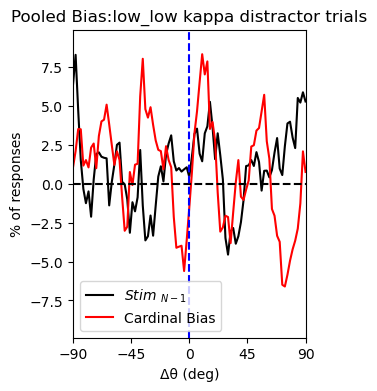

In [24]:
#graph low_low_kappa pooled bias for distractor vs. control trials 
nb=-1
d_ori = SDF.get_nb(nb,low_low_kappa_distractor_data['orient'].values,1,ori_wrap) # dStim_nb
tmp_ori = SDF.wrap(low_low_kappa_distractor_data.orient * 2) / 2


n_bns = 91
bns = np.linspace(-90,90,n_bns)
overlap = 3

# ind = (np.isnan(data['acc']))
# tmp_data = data['acc'][ind==False]
# tmp_ori = data.orient[ind==False]
low_low_kappa_distractor_sd = SDF.do_bining(bns,overlap,d_ori,low_low_kappa_distractor_data['acc']*d2r2,want_var='circ_mean')*r2d2
low_low_kappa_distractor_cb = SDF.do_bining(bns,overlap,tmp_ori,low_low_kappa_distractor_data['acc']*d2r2,want_var='circ_mean')*r2d2

#Pooled Bias - low-low kappa

# #Control w/ out distractor
# plt.plot(bns,control_sd,'r',label='$Control-Stim~_{N-1}$')
# plt.plot(bns,control_cb,color='k',label='Cont. Cardinal Bias')

plt.figure(figsize=(3,4))
plt.plot(bns,low_low_kappa_distractor_sd,'k',label='$Stim~_{N-1}$')
plt.plot(bns,low_low_kappa_distractor_cb,color='r',label='Cardinal Bias')
plt.xlabel("Δθ (deg)")
plt.ylabel("% of responses")
SDF.d_plot(1,9.9,-90)
plt.legend()
plt.title('Pooled Bias:low_low kappa distractor trials')
plt.show()


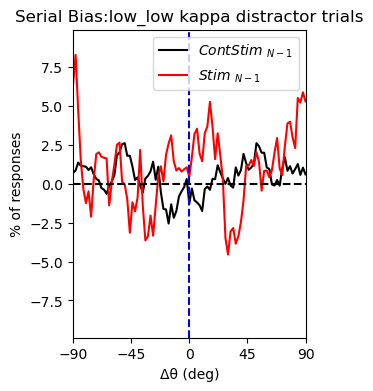

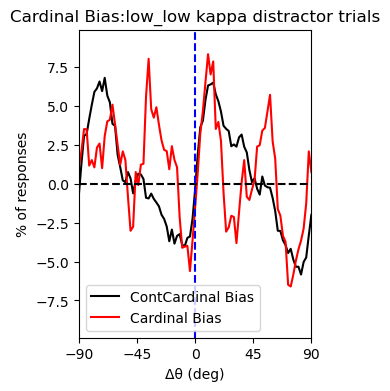

In [30]:
#Pooled Bias - low-low kappa: distractor and control 

# #Control w/ out distractor
# plt.plot(bns,control_sd,'r',label='$Control-Stim~_{N-1}$')
# plt.plot(bns,control_cb,color='k',label='Cont. Cardinal Bias')

#Serial Bias
plt.figure(figsize=(3,4))
plt.plot(bns,control_sd,'k',label='$ContStim~_{N-1}$')

plt.plot(bns,low_low_kappa_distractor_sd,'r',label='$Stim~_{N-1}$')
plt.xlabel("Δθ (deg)")
plt.ylabel("% of responses")
SDF.d_plot(1,9.9,-90)
plt.legend()
plt.title('Serial Bias:low_low kappa distractor trials')
plt.show()

#Caridnal Bias
plt.figure(figsize=(3,4))
plt.plot(bns,control_cb,color='k',label='ContCardinal Bias')

plt.plot(bns,low_low_kappa_distractor_cb,color='r',label='Cardinal Bias')

plt.xlabel("Δθ (deg)")
plt.ylabel("% of responses")
SDF.d_plot(1,9.9,-90)
plt.legend()
plt.title('Cardinal Bias:low_low kappa distractor trials')
plt.show()

## Low-high kappa

In [19]:
# Initialize an empty list to store the trials that had a distractor
low_high_kappa_ = []

# Loop through each row in the DataFrame
for index, row in data.iterrows():
    # Check if the distractor value is > 0 
    if row["kappa"] == 50 and data.loc[index-1, "kappa"] > 100:
        # If the distractor value is > 0, append the trial to the list
        low_high_kappa_cond.append(row)
        
# Create a new DataFrame from the selected rows
low_high_kappa_cond_data = pd.DataFrame(low_high_kappa_cond)

# Print the list of subjects where distractor is > 0 
low_high_kappa_cond_data.head()

,orient,distractor,kappa,subject,resp,respRT,acc,traj
2,84.0,0.0,50.0,2.0,NaN,0.000000,NaN,0.0
10,82.0,0.0,50.0,2.0,NaN,0.000000,NaN,0.0
12,57.0,1.0,50.0,2.0,NaN,0.000000,NaN,0.0
15,91.0,1.0,50.0,2.0,11.5,2.259013,-79.5,-12.5
22,104.0,0.0,50.0,2.0,NaN,0.000000,NaN,0.0


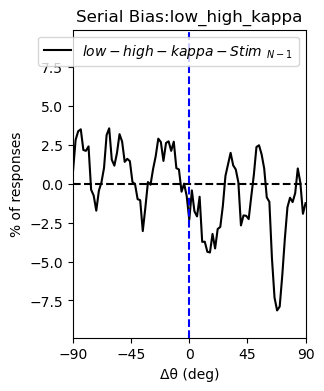

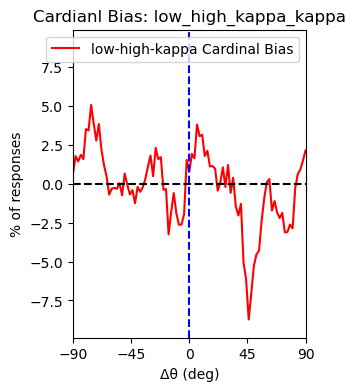

In [20]:
#graph low_low_kappa serial dependence 
nb=-1
d_ori = SDF.get_nb(nb,low_high_kappa_cond_data['orient'].values,1,ori_wrap) # dStim_nb
tmp_ori = SDF.wrap(low_high_kappa_cond_data.orient * 2) / 2


n_bns = 91
bns = np.linspace(-90,90,n_bns)
overlap = 3

# ind = (np.isnan(data['acc']))
# tmp_data = data['acc'][ind==False]
# tmp_ori = data.orient[ind==False]
low_high_kappa_cond_sd = SDF.do_bining(bns,overlap,d_ori,low_high_kappa_cond_data['acc']*d2r2,want_var='circ_mean')*r2d2
low_high_kappa_cond_cb = SDF.do_bining(bns,overlap,tmp_ori,low_high_kappa_cond_data['acc']*d2r2,want_var='circ_mean')*r2d2

#Serial Bias - low-low kappa

# #Control w/ out distractor
# plt.plot(bns,control_sd,'r',label='$Control-Stim~_{N-1}$')
# plt.plot(bns,control_cb,color='k',label='Cont. Cardinal Bias')

plt.figure(figsize=(3,4))
plt.plot(bns,low_high_kappa_cond_sd,'k',label='$low-high-kappa-Stim~_{N-1}$')
plt.xlabel("Δθ (deg)")
plt.ylabel("% of responses")
SDF.d_plot(1,9.9,-90)
plt.legend()
plt.title('Serial Bias:low_high_kappa')
plt.show()

#graph cardinal bias - distractor vs. no distractor 
plt.figure(figsize=(3,4))
plt.plot(bns,low_high_kappa_cond_cb,color='r',label='low-high-kappa Cardinal Bias')
plt.xlabel("Δθ (deg)")
plt.ylabel("% of responses")
SDF.d_plot(1,9.9,-90)
plt.legend()
plt.title('Cardianl Bias: low_high_kappa_kappa')
plt.show()
